In [1]:
from dask.distributed import Client

client = Client(n_workers=4)

In [2]:
from time import sleep

def inc(x):
    # sleep(1)
    return x + 1

def add(x, y):
    # sleep(1)
    return x + y

In [3]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs


In [4]:
from dask import delayed

In [5]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 1.25 ms, sys: 46 µs, total: 1.29 ms
Wall time: 1.03 ms


In [6]:
%%time

z.compute()
y.compute()



CPU times: user 36.4 ms, sys: 16.1 ms, total: 52.5 ms
Wall time: 66.4 ms


3

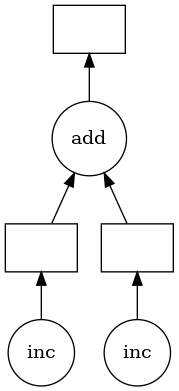

In [7]:
z.visualize()

# Parallelize a for loop

In [8]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [9]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)
total

CPU times: user 21 µs, sys: 6 µs, total: 27 µs
Wall time: 30.3 µs


44

In [10]:
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)
print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
print("After computing :", result)  # After it's computed

Before computing: Delayed('sum-7577dd6b-4105-4d85-92cd-1da88a38a46c')
After computing : 44


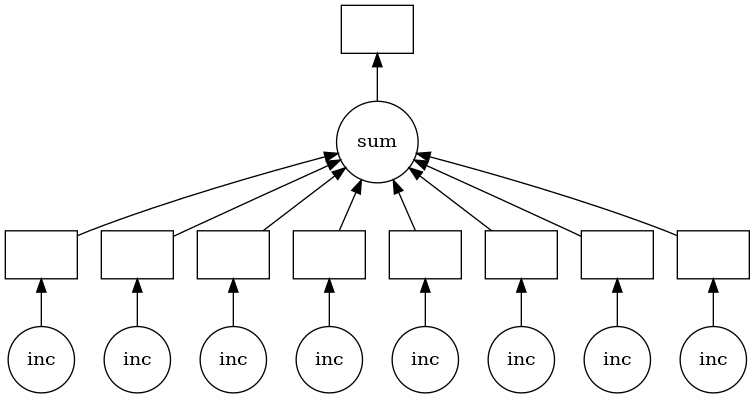

In [11]:
total.visualize()

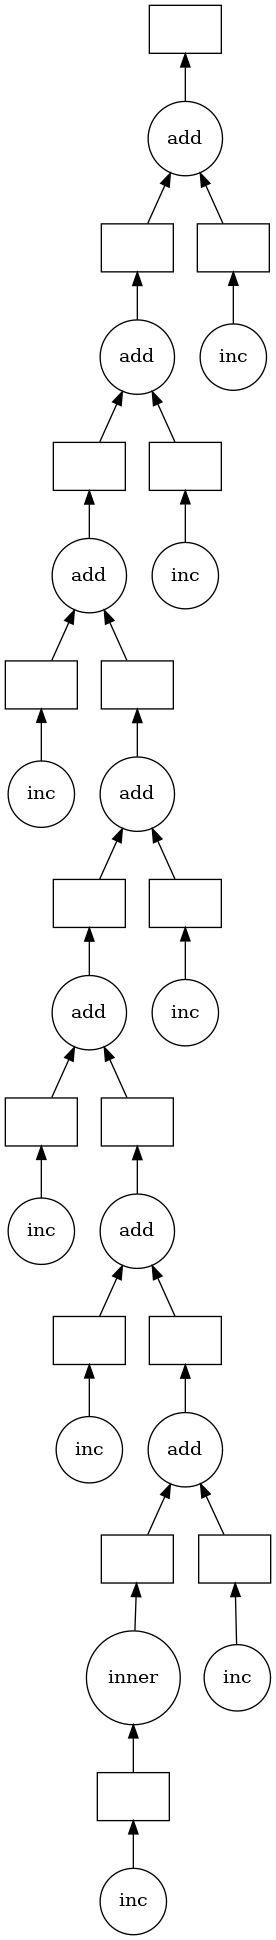

In [12]:
sum(results).visualize()

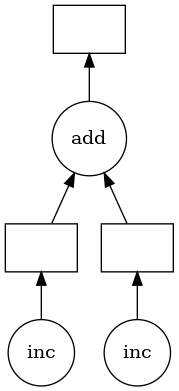

In [13]:
(delayed(inc)(1) + delayed(inc)(2)).visualize()

# Parallelizing a for-loop code with control flow

In [14]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [15]:
%%time
# Sequential code

results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)

total = sum(results)
print(total)

90
CPU times: user 194 ms, sys: 31.3 ms, total: 225 ms
Wall time: 5 s


In [24]:
results = []
for x in data:
    if is_even(x):  # even
        y = delayed(double)(x)
    else:          # odd
        y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)

In [17]:
%time total.compute()

CPU times: user 50.6 ms, sys: 23.8 ms, total: 74.4 ms
Wall time: 1.02 s


90

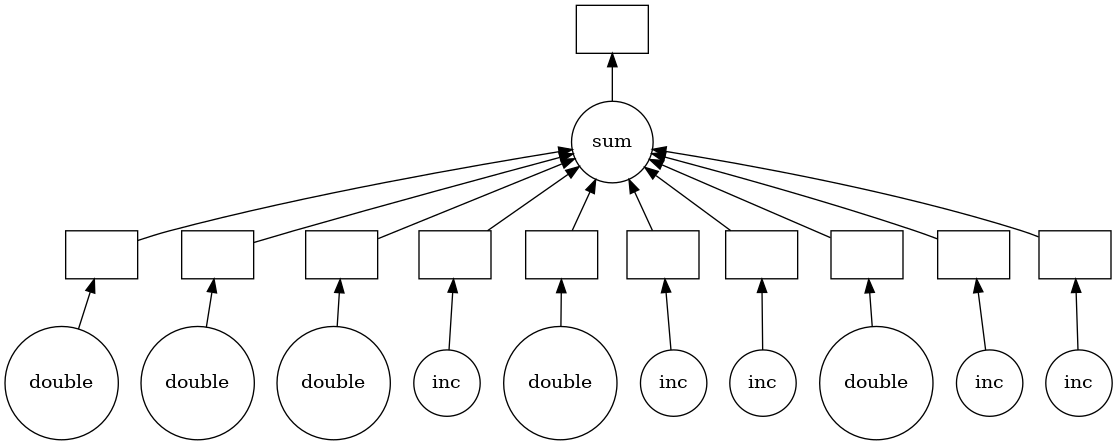

In [18]:
total.visualize()

# Parallelizing a Pandas Groupby Reduction